In [2]:
using ZipFile, Distributed, CSV, DataFrames, Random, StatsBase, Plots, Statistics, StableRNGs, MLJBase

file = CSV.read("train.csv", DataFrame)

LoadError: InterruptException:

In [ ]:
df = file |> Tables.matrix

mat_0 = df[df[:,21] .<= 1, :]
mat_1 = df[df[:,21] .>= 2, :]

1000×21 Matrix{Float64}:
 1021.0  1.0  0.5  1.0   0.0  1.0  53.0  …   3.0   7.0  1.0  1.0  0.0  2.0
  563.0  1.0  0.5  1.0   2.0  1.0  41.0      2.0   9.0  1.0  1.0  0.0  2.0
  615.0  1.0  2.5  0.0   0.0  0.0  10.0      8.0  11.0  1.0  0.0  0.0  2.0
 1821.0  0.0  1.7  0.0   4.0  1.0  10.0      8.0  18.0  1.0  0.0  1.0  3.0
  769.0  1.0  2.9  1.0   0.0  0.0   9.0      2.0   7.0  0.0  0.0  0.0  3.0
 1520.0  1.0  2.2  0.0   5.0  1.0  33.0  …   9.0  13.0  1.0  1.0  1.0  3.0
  803.0  1.0  2.1  0.0   7.0  0.0  17.0      1.0   4.0  1.0  0.0  1.0  2.0
  838.0  0.0  0.5  0.0   1.0  1.0  13.0      9.0  19.0  1.0  0.0  1.0  3.0
  595.0  0.0  0.9  1.0   7.0  1.0  23.0      2.0  18.0  1.0  1.0  0.0  3.0
  772.0  0.0  1.1  1.0  12.0  0.0  39.0     15.0   3.0  1.0  1.0  0.0  3.0
 1709.0  1.0  2.1  0.0   1.0  0.0  13.0  …   1.0  15.0  1.0  0.0  0.0  3.0
  961.0  1.0  1.4  1.0   0.0  1.0  57.0      9.0   7.0  1.0  1.0  1.0  2.0
  519.0  1.0  1.6  1.0   7.0  1.0  51.0      1.0   4.0  1.0  0.0  1.0  3.0


In [ ]:
train_data = randsubseq(1:1000, 0.7)
train_df = vcat(mat_0[train_data, :], mat_1[train_data, :])

test_data = [i for i in 1:1000 if isempty(searchsorted(train_data, i))]
test_df = vcat(mat_0[test_data, :], mat_1[test_data, :])

568×21 Matrix{Float64}:
  842.0  0.0  2.2  0.0   1.0  0.0   7.0  …   7.0  19.0  0.0  0.0  1.0  1.0
 1445.0  1.0  0.5  0.0   0.0  0.0  53.0      1.0  20.0  1.0  0.0  0.0  0.0
 1815.0  0.0  2.8  0.0   2.0  0.0  33.0      0.0   2.0  1.0  0.0  0.0  1.0
 1866.0  0.0  0.5  0.0  13.0  1.0  52.0      9.0   3.0  1.0  0.0  1.0  0.0
 1949.0  0.0  2.6  1.0   4.0  0.0  47.0      5.0  20.0  0.0  0.0  1.0  1.0
  851.0  0.0  0.5  0.0   3.0  0.0  21.0  …   7.0  10.0  1.0  0.0  1.0  0.0
 1319.0  1.0  0.9  0.0   3.0  1.0  41.0      5.0   3.0  1.0  1.0  1.0  1.0
  725.0  0.0  1.3  1.0  16.0  0.0  60.0      4.0  15.0  1.0  0.0  0.0  1.0
 1253.0  1.0  0.5  1.0   5.0  1.0   5.0      0.0   4.0  1.0  1.0  0.0  1.0
  823.0  1.0  2.7  1.0  13.0  0.0  60.0     11.0  17.0  1.0  1.0  1.0  0.0
 1484.0  0.0  3.0  0.0   3.0  0.0  12.0  …   4.0  20.0  1.0  1.0  0.0  1.0
 1114.0  0.0  2.8  0.0   4.0  1.0   9.0      7.0  17.0  1.0  1.0  0.0  0.0
 1127.0  1.0  2.9  1.0   5.0  1.0  57.0      5.0  17.0  1.0  1.0  1.0  1.0
 

In [ ]:
X_train = train_df[:, 1:20]
X_test = test_df[:, 1:20]

y_train = train_df[:, 21]
y_test = test_df[:, 21]

568-element Vector{Float64}:
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 1.0
 1.0
 0.0
 1.0
 0.0
 1.0
 ⋮
 2.0
 3.0
 3.0
 3.0
 3.0
 2.0
 2.0
 2.0
 3.0
 2.0
 2.0
 3.0

In [ ]:
dt = StatsBase.fit(ZScoreTransform, X_train, dims=1)

X_train_std = StatsBase.transform(dt, X_train)
X_test_std = StatsBase.transform(dt, X_test)

X_train_std = transpose(X_train_std) 
X_test_std = transpose(X_test_std)

20×568 transpose(::Matrix{Float64}) with eltype Float64:
 -0.888487   0.477573   1.31579    …   0.328054   0.0629972   1.3475
 -0.989925   1.00947   -0.989925      -0.989925  -0.989925    1.00947
  0.839761  -1.24713    1.57631       -0.510578   0.348729    0.717003
 -1.02511   -1.02511   -1.02511        0.974828   0.974828   -1.02511
 -0.762897  -0.99688   -0.528913      -0.762897   1.81092     0.874987
 -1.07057   -1.07057   -1.07057    …   0.933427  -1.07057    -1.07057
 -1.37752    1.15733    0.0552209     -0.771361   0.110326    1.48796
  0.313961   0.662753   0.313961      -1.08121   -1.43       -1.43
  1.38261    0.982859   0.554549      -0.30207    0.26901    -1.38712
 -1.09373    1.07315   -0.226978      -1.09373    0.206399    0.206399
 -1.29001    0.68994    1.18493    …   1.01993    1.01993     0.854935
 -1.40562   -0.593418  -0.102989       0.409633  -0.955138    1.78328
 -1.14876   -0.964795  -1.16716       -0.852116  -1.19245     1.52565
  0.39896   -0.945138  -0.590111 

In [ ]:
function initialise_model_weights(layer_dims, seed = 7)
    params = Dict()

    for l=2:length(layer_dims)
        params[string("W_", (l-1))] = rand(StableRNG(seed), layer_dims[l], layer_dims[l-1]) * sqrt(2 / layer_dims[l-1])
        params[string("b_", (l-1))] = zeros(layer_dims[l], 1)
    end

    return params
end

initialise_model_weights (generic function with 2 methods)

In [ ]:

function sigmoid(Z)
    A = 1 ./ (1 .+ exp.(.-Z))
    return (A = A, Z = Z)
end

function linear_forward(A, W, b)
    Z = (W * A) .+ b
    cache = (A, W, b)

    @assert size(Z) == (size(W, 1), size(A, 2))

    return (Z = Z, cache = cache)
end

function forward_activation(A_prev, W, b, activation_function="sigmoid")
    Z, linear_cache = linear_forward(A_prev, W, b)

    if activation_function == "sigmoid"
        A, activation_cache = sigmoid(Z)
    end

    cache = (linear_step_cache=linear_cache, activation_step_cache=activation_cache)

    @assert size(A) == (size(W, 1), size(A_prev, 2))

    return A, cache
end


function forward_propagate_model_weights(input, parameters)
    master_cache = []
    A = input
    L = Int(length(parameters) / 2)

    for l = 1 : (L-1)
        A_prev = A
        A, cache = forward_activation(A_prev, parameters[string("W_", (l))], parameters[string("b_", (l))], "sigmoid")
        push!(master_cache , cache)
    end

    Ŷ, cache = forward_activation(A, parameters[string("W_", (L))], parameters[string("b_", (L))], "sigmoid")
    push!(master_cache, cache)

    return Ŷ, master_cache
end

function calculate_cost(Ŷ, Y)
    m = max(size(Y, 2), size(Y, 1))
    epsilon = eps(1.0)

    Ŷ_new = [max(i, epsilon) for i in Ŷ]
    Ŷ_new = [min(i, 1-epsilon) for i in Ŷ_new]

    cost = -sum(Y .* log.(Ŷ_new) + (1 .- Y) .* log.(1 .- Ŷ_new)) / m
    return cost
end

calculate_cost (generic function with 1 method)

In [ ]:
function sigmoid_backwards(∂A, activated_cache)
    s = sigmoid(activated_cache).A
    ∂Z = ∂A .* s .* (1 .- s)

    @assert (size(∂Z) == size(activated_cache))
    return ∂Z
end

function linear_backward(∂Z, cache)
    # Unpack cache
    A_prev , W , b = cache
    m = size(A_prev, 2)

    # Partial derivates of each of the components
    ∂W = ∂Z * (A_prev') / m
    ∂b = sum(∂Z, dims = 2) / m
    ∂A_prev = (W') * ∂Z

    @assert (size(∂A_prev) == size(A_prev))
    @assert (size(∂W) == size(W))
    @assert (size(∂b) == size(b))

    return ∂W , ∂b , ∂A_prev
end

function activation_backward(∂A, cache, activation_function="sigmiod")
    @assert activation_function ∈ ("sigmoid", "relu")

    linear_cache , cache_activation = cache

    if (activation_function == "relu")

        ∂Z = relu_backwards(∂A , cache_activation)
        ∂W , ∂b , ∂A_prev = linear_backward(∂Z , linear_cache)

    elseif (activation_function == "sigmoid")

        ∂Z = sigmoid_backwards(∂A , cache_activation)
        ∂W , ∂b , ∂A_prev = linear_backward(∂Z , linear_cache)

    end

    return ∂W , ∂b , ∂A_prev
end

activation_backward (generic function with 2 methods)

In [ ]:
function back_propagate_model_weights(Ŷ, Y, master_cache)
    ∇ = Dict()

    L = length(master_cache)
    Y = reshape(Y , size(Ŷ))

    ∂Ŷ = (-(Y ./ Ŷ) .+ ((1 .- Y) ./ ( 1 .- Ŷ)))
    current_cache = master_cache[L]

        ∇[string("∂W_", (L))], ∇[string("∂b_", (L))], ∇[string("∂A_", (L-1))] = activation_backward(∂Ŷ, current_cache, "sigmoid")

    for l=reverse(0:L-2)
        current_cache = master_cache[l+1]
        ∇[string("∂W_", (l+1))], ∇[string("∂b_", (l+1))], ∇[string("∂A_", (l))] = activation_backward(∇[string("∂A_", (l+1))],
                                                                                                             current_cache,
                                                                                                             "sigmoid")
    end
    return ∇
end

back_propagate_model_weights (generic function with 1 method)

In [ ]:

function update_model_weights(parameters, ∇, η)
    L = Int(length(parameters) / 2)

    for l = 0: (L-1)
        parameters[string("W_", (l + 1))] -= η .* ∇[string("∂W_", (l + 1))]
        parameters[string("b_", (l + 1))] -= η .* ∇[string("∂b_", (l + 1))]
    end

    return parameters
end


function calculate_accuracy(Ŷ , Y)
    @assert size(Ŷ) == size(Y)
    return sum((Ŷ .> 0.5) .== Y) / length(Y)
end

calculate_accuracy (generic function with 1 method)

In [ ]:
function assess_accuracy(Ŷ , Y)
    @assert size(Ŷ) == size(Y)
    return sum((Ŷ .> 0.5) .== Y) / length(Y)
end

assess_accuracy (generic function with 1 method)

In [ ]:

function update_model_weights_counts(parameters_old,parameters_new)
    L=Int(length(parameters_old) / 2)
    count=0
    for l = 0 : (L-1)
        for m=1:Int(size(parameters_old[string("W_",(l+1))])[L])
            if parameters_old[string("W_",(l+1))]!=parameters_new[string("W_",(l+1))]
                count=count+1
            end
        end
    end
    return count
end
        

update_model_weights_counts (generic function with 1 method)

In [ ]:
function train_network(layer_dims , DMatrix, Y;  η=0.001, epochs=1000, seed=2020, verbose=true)
    # Initiate an empty container for cost, iterations, and accuracy at each iteration
    costs = []
    iters = []
    accuracy = []

    # Initialise random weights for the network
    params = initialise_model_weights(layer_dims, seed)

    # Train the network
    for i = 1:epochs

        Ŷ , caches  = forward_propagate_model_weights(DMatrix, params)
        cost = calculate_cost(Ŷ, Y)
        acc = assess_accuracy(Ŷ, Y)
        ∇  = back_propagate_model_weights(Ŷ, Y, caches)
        params = update_model_weights(params, ∇, η)

        if verbose
            println("Iteration -> $i, Cost -> $cost, Accuracy -> $acc")
        end

        # Update containers for cost, iterations, and accuracy at the current iteration (epoch)
        push!(iters , i)
        push!(costs , cost)
        push!(accuracy , acc)
    end
        return (cost = costs, iterations = iters, accuracy = accuracy, parameters = params)
end

train_network (generic function with 1 method)

Iteration -> 1, Cost -> 0.7949866042983018, Accuracy -> 0.5
Iteration -> 2, Cost -> 0.7937055685736337, Accuracy -> 0.5
Iteration -> 3, Cost -> 0.7924400661977145, Accuracy -> 0.5
Iteration -> 4, Cost -> 0.791189934378869, Accuracy -> 0.5
Iteration -> 5, Cost -> 0.789955011359361, Accuracy -> 0.5
Iteration -> 6, Cost -> 0.7887351364261839, Accuracy -> 0.5
Iteration -> 7, Cost -> 0.7875301499213111, Accuracy -> 0.5
Iteration -> 8, Cost -> 0.7863398932514165, Accuracy -> 0.5
Iteration -> 9, Cost -> 0.7851642088970706, Accuracy -> 0.5
Iteration -> 10, Cost -> 0.7840029404214236, Accuracy -> 0.5


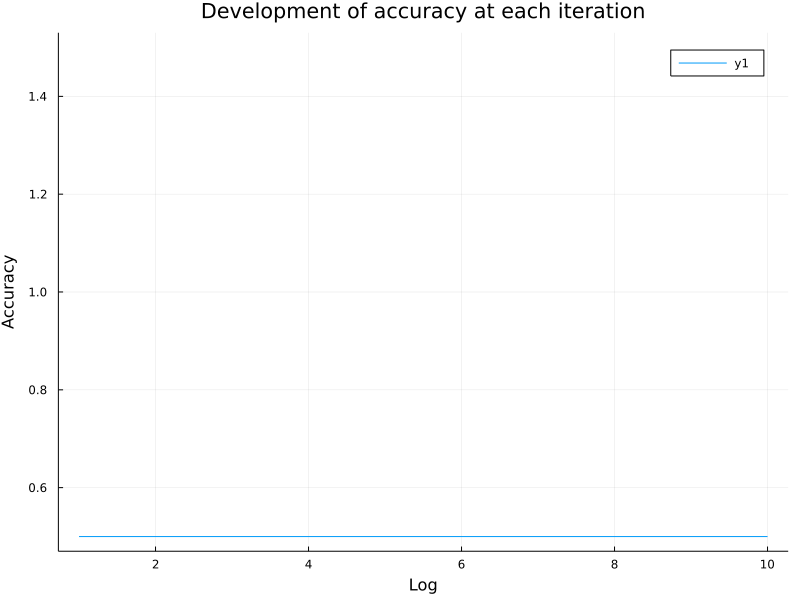

In [ ]:
X, y = make_blobs(10_000, 3; centers=2, as_table=false, rng=2020);
X = Matrix(X');
y = reshape(y, (1, size(X, 2)));
f(x) =  x == 2 ? 0 : x
y2 = f.(y);

# Input dimensions
input_dim = size(X, 1);

# Train the model
nn_results = train_network([input_dim, 5, 3, 1], X, y2; η=0.01, epochs=10, seed=1, verbose=true);

# Plot accuracy per iteration
p1 = plot(nn_results.accuracy,
         xlabel="Log",
         ylabel="Accuracy",
         title="Development of accuracy at each iteration");

# Combine accuracy and cost plots
plot(p1, layout = (2, 1), size = (800, 600))